<a href="https://colab.research.google.com/github/Keshigami/Machine-Learning/blob/main/cohort_of_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
#initial data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


In [ ]:
df.shape

(1610, 17)

In [ ]:
df.isnull().sum()

,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0
instrumentalness,0


In [ ]:
df.shape

(1610, 17)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1610, 17)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'track_number'),
  Text(1, 0, 'acousticness'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'instrumentalness'),
  Text(5, 0, 'liveness'),
  Text(6, 0, 'loudness'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'popularity'),
  Text(11, 0, 'duration_ms')])

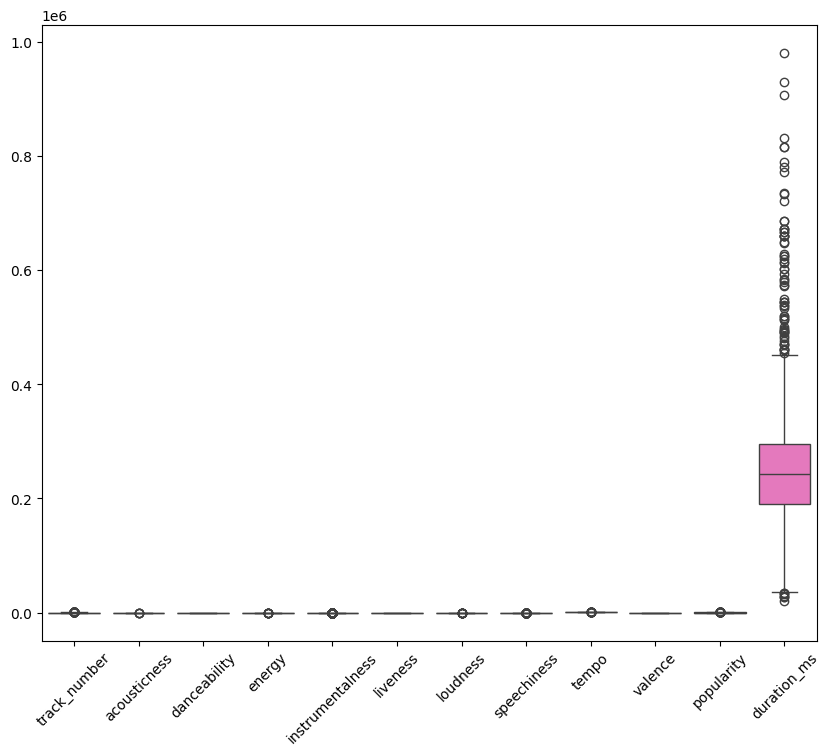

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)

<Axes: ylabel='duration_ms'>

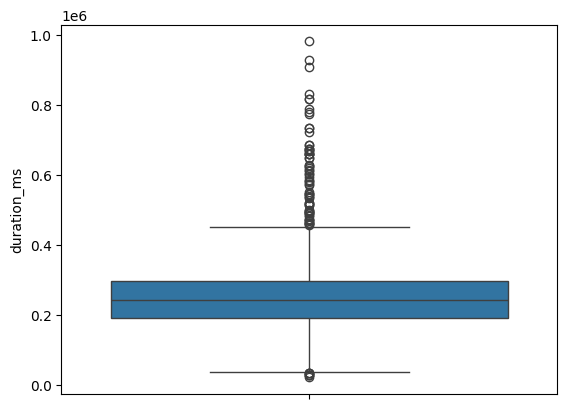

In [ ]:
sns.boxplot(data=df['duration_ms'])

<Axes: ylabel='duration_ms'>

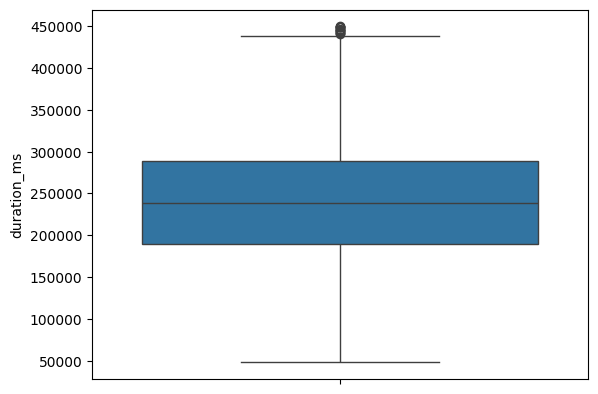

In [ ]:
df = df[(df['duration_ms']<450000)&(df['duration_ms']>40000)]
sns.boxplot(data=df['duration_ms'])

In [ ]:
import numpy as np
df.select_dtypes(include=np.number).columns.tolist()

['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'duration_ms']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'track_number'),
  Text(1, 0, 'acousticness'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'instrumentalness'),
  Text(5, 0, 'liveness'),
  Text(6, 0, 'loudness'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'popularity')])

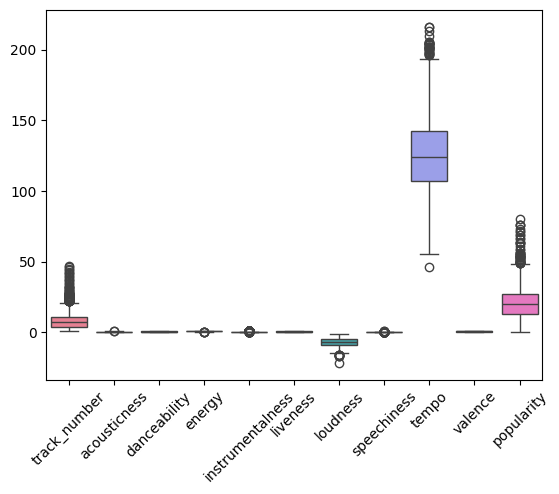

In [ ]:
sns.boxplot(data=df[['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity']])
plt.xticks(rotation=45)

In [ ]:
df = df[(df['track_number']<20) & (df['tempo']<180)  & (df['popularity']<50)]

In [ ]:
df.shape

(1302, 17)

In [ ]:
#popularity outlier calculation
q1 = np.quantile(df['popularity'],0.25)
q3 = np.quantile(df['popularity'],0.75)
iqr = q3 - q1
upper_range = q3 + 1.5*iqr
lower_range = q1 - 1.5*iqr
print(upper_range)
print(lower_range)

48.0
-8.0


In [ ]:
numerical_columns = ['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'duration_ms']
#outlier_values = []
for i in numerical_columns:
  q1 = np.quantile(df[i],0.25)
  q3 = np.quantile(df[i],0.75)
  iqr = q3 - q1
  upper_range =  q3 + 1.5*iqr
  lower_range = q1 - 1.5*iqr
  df = df[(df[i]<upper_range) & (df[i]>lower_range)]

In [ ]:
df.shape

(976, 17)

In [ ]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.437,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.318,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.416,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.313,34,263160
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.400,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.206,32,305106
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,3ixZ1NQk5sqvBZgWeIdiqr,spotify:track:3ixZ1NQk5sqvBZgWeIdiqr,0.275,0.340,0.956,0.125000,0.741,-5.539,0.0915,101.628,0.125,31,244293
6,Angie - Live,Licked Live In NYC,2022-06-10,7,3R1Vq1RS6mWNSD2oni6jNf,spotify:track:3R1Vq1RS6mWNSD2oni6jNf,0.561,0.262,0.810,0.000003,0.972,-6.851,0.0969,77.520,0.394,31,245506


In [ ]:
df[['album','popularity']].sort_values(by='popularity',ascending=False)

,album,popularity
898,Some Girls,46
240,Honk (Deluxe),46
925,Some Girls (Deluxe Version),46
1436,Aftermath (UK Version),46
865,Tattoo You (2009 Re-Mastered),45
...,...,...
1597,England's Newest Hit Makers,0
1397,Got Live if you want it!,0
1400,Got Live if you want it!,0
1401,Got Live if you want it!,0


In [ ]:
df.groupby('album')['popularity'].sum().sort_values(ascending=False)

,popularity
album,
Some Girls (Deluxe Version),672
Tattoo You (Super Deluxe),607
Goats Head Soup (Deluxe),535
Sticky Fingers (Super Deluxe),513
Honk (Deluxe),502
...,...
Get Yer Ya Yas Out,27
Now!,24
Out Of Our Heads (UK Sequence),20


In [ ]:
numerical_columns

['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'duration_ms']

In [ ]:
df[numerical_columns].corr(method='pearson')

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
track_number,1.000000,0.056742,-0.080530,-0.024484,-0.056391,0.119415,-0.011215,0.058819,-0.072873,-0.135660,-0.129885,0.130585
acousticness,0.056742,1.000000,0.096289,-0.433212,-0.068983,-0.096848,-0.246836,-0.161356,-0.180121,-0.185324,0.055089,0.093599
danceability,-0.080530,0.096289,1.000000,-0.314047,-0.018543,-0.514744,-0.318379,-0.264863,-0.184861,0.474435,0.079750,-0.237065
energy,-0.024484,-0.433212,-0.314047,1.000000,0.090565,0.467993,0.688224,0.530859,0.275915,0.156341,-0.024651,0.147973
instrumentalness,-0.056391,-0.068983,-0.018543,0.090565,1.000000,0.015739,0.079189,-0.046630,0.029352,0.121500,0.065012,0.028805
liveness,0.119415,-0.096848,-0.514744,0.467993,0.015739,1.000000,0.326998,0.414461,0.101718,-0.291306,-0.161659,0.274435
loudness,-0.011215,-0.246836,-0.318379,0.688224,0.079189,0.326998,1.000000,0.303911,0.122671,-0.059705,0.180889,0.272440
speechiness,0.058819,-0.161356,-0.264863,0.530859,-0.046630,0.414461,0.303911,1.000000,0.222732,-0.243885,-0.120490,0.121651
tempo,-0.072873,-0.180121,-0.184861,0.275915,0.029352,0.101718,0.122671,0.222732,1.000000,0.112867,-0.059084,-0.054950
valence,-0.135660,-0.185324,0.474435,0.156341,0.121500,-0.291306,-0.059705,-0.243885,0.112867,1.000000,0.012861,-0.269248


<Axes: >

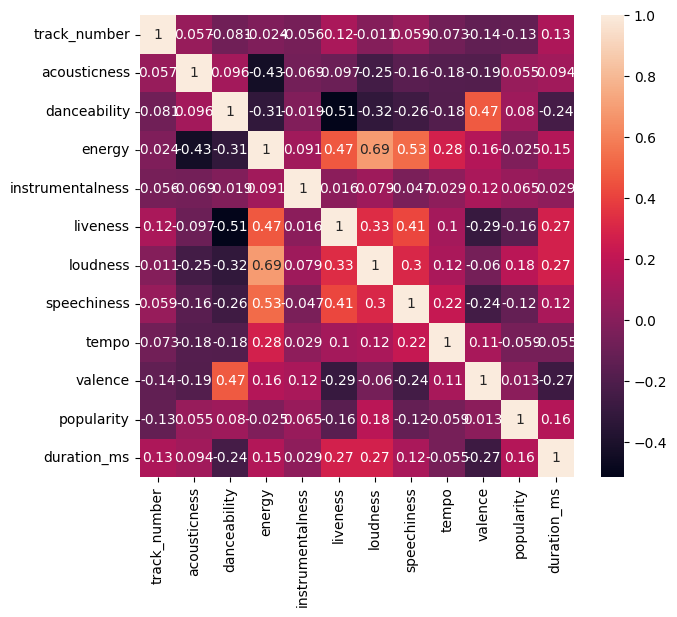

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [ ]:
df.groupby('track_number')['popularity'].sum().sort_values(ascending=False)

,popularity
track_number,
8,1812
5,1791
4,1754
6,1729
1,1631
7,1624
3,1604
9,1479
10,1257


Text(0, 0.5, 'popularity')

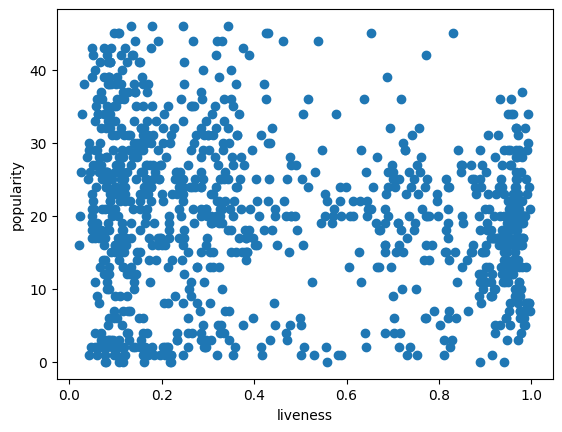

In [ ]:
plt.scatter(df['liveness'],df['popularity'])
plt.xlabel('liveness')
plt.ylabel('popularity')

Text(0, 0.5, 'loudness')

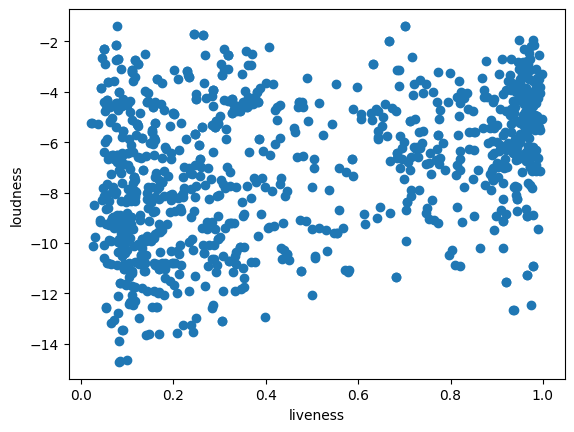

In [ ]:
plt.scatter(df['liveness'],df['loudness'])
plt.xlabel('liveness')
plt.ylabel('loudness')

In [ ]:
#Dimensionality reduction using principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[numerical_columns])
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [ ]:
df[numerical_columns].shape

(976, 12)

In [ ]:
df_pca.head()

,PC 1,PC 2
0,8980.782888,10.802437
1,18967.782915,9.594908
2,60913.782850,10.905183
3,100.783407,-19.155708
4,1313.783855,-43.258452


In [ ]:
df[numerical_columns].head()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,2,0.437,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.318,34,253173
2,3,0.416,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.313,34,263160
4,5,0.400,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.206,32,305106
5,6,0.275,0.340,0.956,0.125000,0.741,-5.539,0.0915,101.628,0.125,31,244293
6,7,0.561,0.262,0.810,0.000003,0.972,-6.851,0.0969,77.520,0.394,31,245506


In [ ]:
df['predicted'] = y_predicted

In [ ]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster,predicted
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.437,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.318,34,253173,1,0
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.416,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.313,34,263160,1,0
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.400,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.206,32,305106,1,0
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,3ixZ1NQk5sqvBZgWeIdiqr,spotify:track:3ixZ1NQk5sqvBZgWeIdiqr,0.275,0.340,0.956,0.125000,0.741,-5.539,0.0915,101.628,0.125,31,244293,0,1
6,Angie - Live,Licked Live In NYC,2022-06-10,7,3R1Vq1RS6mWNSD2oni6jNf,spotify:track:3R1Vq1RS6mWNSD2oni6jNf,0.561,0.262,0.810,0.000003,0.972,-6.851,0.0969,77.520,0.394,31,245506,0,1


In [ ]:
df_pca.head()

,PC 1,PC 2
0,8980.782888,10.802437
1,18967.782915,9.594908
2,60913.782850,10.905183
3,100.783407,-19.155708
4,1313.783855,-43.258452


In [ ]:
df_pca.columns

Index(['PC 1', 'PC 2'], dtype='object')

In [ ]:
#importing Kmeans library from scikit-learn
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_pca[['PC 1','PC 2']])
    sse.append(km.inertia_)

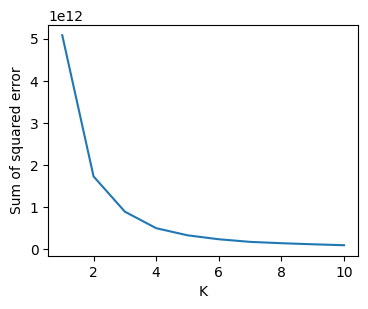

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#calling the Kmeans library and we have decided tha number of clusters to be equal to 3
km = KMeans(n_clusters=4)
#train the model on two columns mean distance driven per day and overspeeding mean percent time
y_predicted = km.fit_predict(df_pca[['PC 1','PC 2']])
y_predicted

array([0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 3, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       2, 2, 3, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 3, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 1,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 1, 0, 1,
       0, 0, 2, 0, 0, 2, 3, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 3,
       3, 2, 1, 3, 2, 0, 3, 0, 0, 1, 3, 2, 3, 2, 0,

In [ ]:
#adding one more column named cluster which has the prediction
df_pca['cluster']=y_predicted
df_pca.sample(5)

,PC 1,PC 2,cluster
586,30900.783219,-7.687434,1
871,-84699.216868,-6.566199,3
672,-27099.217347,14.784387,0
323,1273.783092,-6.641450,0
783,-47526.218146,23.159856,0


In [ ]:
km.cluster_centers_

array([[-3.00697788e+04,  1.96471037e+00],
       [ 3.74483407e+04,  4.76323174e-01],
       [ 1.25219121e+05, -2.33547373e+00],
       [-9.46737396e+04, -2.36535126e+00]])

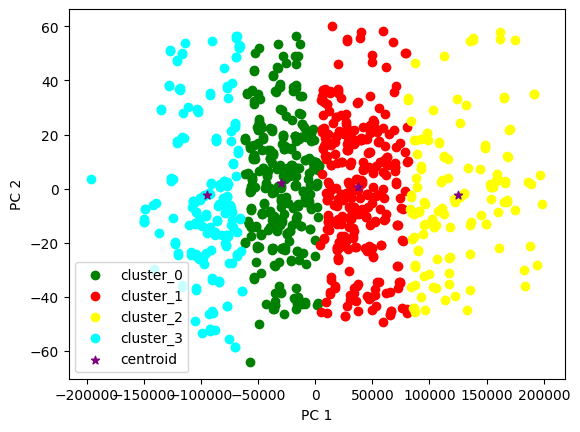

In [ ]:
df1 = df_pca[df_pca.cluster==0]
df2 = df_pca[df_pca.cluster==1]
df3 = df_pca[df_pca.cluster==2]
df4 = df_pca[df_pca.cluster==3]

plt.scatter(df1['PC 1'],df1['PC 2'],color='green',label='cluster_0')
plt.scatter(df2['PC 1'],df2['PC 2'],color='red',label='cluster_1')
plt.scatter(df3['PC 1'],df3['PC 2'],color='yellow',label='cluster_2')
plt.scatter(df4['PC 1'],df4['PC 2'],color='cyan',label='cluster_3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

In [ ]:
df_new = df[100:105]
df_new

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
178,"Star Star - Live / Forest National Arena, Brus...",Goats Head Soup (Deluxe),2020-09-04,5,0bHSB6Uaj961kvixSxpneN,spotify:track:0bHSB6Uaj961kvixSxpneN,0.09670,0.455,0.961,0.002360,0.978,-4.345,0.0777,149.063,0.804,20,256360,1
179,Dancing With Mr D - Live / Forest National Are...,Goats Head Soup (Deluxe),2020-09-04,6,7vPc3SkHheOPlvs2jee78q,spotify:track:7vPc3SkHheOPlvs2jee78q,0.07590,0.489,0.919,0.000174,0.309,-4.325,0.0350,111.848,0.826,19,277600,1
180,Doo Doo Doo Doo Doo (Heartbreaker) - Live / Fo...,Goats Head Soup (Deluxe),2020-09-04,7,4esw3O5K1LCsuBqQZiJkKh,spotify:track:4esw3O5K1LCsuBqQZiJkKh,0.07650,0.319,0.925,0.000558,0.932,-5.584,0.0880,125.335,0.532,20,303213,1
181,"Angie - Live / Forest National Arena, Brussels...",Goats Head Soup (Deluxe),2020-09-04,8,5JYx98cbTYQoEwdJzChyDN,spotify:track:5JYx98cbTYQoEwdJzChyDN,0.44400,0.374,0.784,0.000068,0.131,-6.621,0.0832,134.467,0.347,22,314920,1
184,Honky Tonk Women - Live / Forest National Aren...,Goats Head Soup (Deluxe),2020-09-04,11,5hViuOELqYLRJ3UEdYAGEk,spotify:track:5hViuOELqYLRJ3UEdYAGEk,0.00948,0.343,0.974,0.001780,0.748,-3.690,0.0638,122.223,0.810,19,191573,0


In [ ]:
df_new = df_new[numerical_columns]

In [ ]:
df_new

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
178,5,0.09670,0.455,0.961,0.002360,0.978,-4.345,0.0777,149.063,0.804,20,256360
179,6,0.07590,0.489,0.919,0.000174,0.309,-4.325,0.0350,111.848,0.826,19,277600
180,7,0.07650,0.319,0.925,0.000558,0.932,-5.584,0.0880,125.335,0.532,20,303213
181,8,0.44400,0.374,0.784,0.000068,0.131,-6.621,0.0832,134.467,0.347,22,314920
184,11,0.00948,0.343,0.974,0.001780,0.748,-3.690,0.0638,122.223,0.810,19,191573


In [ ]:
df_new.index.tolist()

[178, 179, 180, 181, 184]

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_new)
df_new = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [ ]:
df_new

,PC 1,PC 2
0,-12373.199403,20.896278
1,8866.799560,-16.936708
2,34479.799902,-4.188679
3,46186.800162,4.627848
4,-77160.200222,-4.398739


In [ ]:
y_predicted = km.fit_predict(df_new)
y_predicted

array([0, 3, 1, 1, 2], dtype=int32)